In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("/Users/sunghyun/Desktop/data_model_change3.csv", index_col=0)
df.head()
df.tail()

,출원번호,출원일자,공개번호,공개일자,공고번호,공고일자,등록번호,등록일자,발명의명칭,IPC분류,출원인,발명자/고안자,대리인
국가,,,,,,,,,,,,,
US,17085698,2020.10.30,2.021024e+10,2021.8.12,11382820,2022.7.12,11382820,2022.7.12,Stair assist cane,A61H3/00,"William Hood English,Norman Earl Smith, II","William Hood English,Norman Earl Smith, II","Williams Intellectual Property,Timothy Snyder"
US,16731700,2019.12.31,2.020021e+10,2020.7.2,11426323,2022.8.30,11426323,2022.8.30,Multi-functional foot crutch,"A61H3/02,A45B9/04,A61H3/00",Joint Project Limited,Gillian Thies,"Morgan, Lewis &#x26; Bockius LLP"
US,16593293,2019.10.4,2.021013e+10,2021.5.6,11554072,2023.1.17,11554072,2023.1.17,Smart sensor cane,A61H3/06,Carmelo Roman,Carmelo Roman,"McCarter &#x26; English, LLP"
US,17376746,2021.7.15,NaN,NaN,11564465,2023.1.31,11564465,2023.1.31,Cane with a leg strap,"A45B9/00,A45B3/04,A45B3/02,A45B9/02,A45B9/04",Michael Hale,Michael Hale,"Sanchelima &#x26; Associates, P.A.,Christian S..."
US,17145145,2021.1.8,2.021023e+10,2021.7.29,11774248,2023.10.3,11774248,2023.10.3,Systems and methods for performing inclusive i...,"G01C21/20,G06V20/20,H04W4/024",Tata Consultancy Services Limited,"Charudatta Jadhav,Govind Rajput,Achampet Harsh...","Finnegan, Henderson, Farabow, Garrett &#x26; D..."


In [3]:
df.dtypes


출원번호         int64
출원일자        object
공개번호       float64
공개일자        object
공고번호        object
공고일자        object
등록번호        object
등록일자        object
발명의명칭       object
IPC분류       object
출원인         object
발명자/고안자     object
대리인         object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, US to US
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   출원번호     195 non-null    int64  
 1   출원일자     195 non-null    object 
 2   공개번호     75 non-null     float64
 3   공개일자     75 non-null     object 
 4   공고번호     195 non-null    object 
 5   공고일자     195 non-null    object 
 6   등록번호     195 non-null    object 
 7   등록일자     195 non-null    object 
 8   발명의명칭    195 non-null    object 
 9   IPC분류    195 non-null    object 
 10  출원인      114 non-null    object 
 11  발명자/고안자  195 non-null    object 
 12  대리인      169 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 21.3+ KB


In [5]:
df.drop(['공개번호', '공개일자', '공고번호', '등록번호', '발명자/고안자', '대리인'], axis=1, inplace=True)

In [6]:
#등록 x + 등록완료
df.dropna(subset=['출원일자', '출원인','IPC분류'], inplace=True)

#등록 완료된 출원만 고른 버전
df1 = df.dropna(subset=['등록일자'])

In [7]:
df.shape

(114, 7)

In [8]:
df['등록일자'] = df['등록일자'].str.extract('(\d{4})')
df['등록일자'] = pd.to_numeric(df['등록일자'])

In [9]:
df = df.sort_values(by='등록일자')

In [10]:
df.head(100)

,출원번호,출원일자,공고일자,등록일자,발명의명칭,IPC분류,출원인
국가,,,,,,,
US,5372179,1973.6.21,1975.2.25,1975,AUXILIARY SKI FOR PHYSICALLY HANDICAPPED PERSONS,A63C11/22,Nippon Gakki Seizo Kabushiki Kaisha
US,6454985,1983.1.3,1985.4.9,1985,Height adjustable crutch,A61H3/02,"Guardian Products Company, Inc."
US,6402594,1982.7.28,1985.4.16,1985,"Resilient support foot for walking aids, parti...",A45B9/04,S & F Orthopadietechnik GmbH
US,6472968,1983.3.7,1985.7.9,1985,Cane,"A45B9/00,F16C11/10",Knotter; David G.
US,6438052,1982.11.1,1985.11.5,1985,Sonic ranging/detection system employing varie...,"G01S15/14,G01S7/52",Polaroid Corporation
...,...,...,...,...,...,...,...
US,15119403,2015.3.31,2020.1.21,2020,Wearable robotic device,"A61F5/01,A61H3/00,A61H1/02,B25J9/00,B25J9/10",Parker-Hannifin Corporation
US,16367406,2019.3.28,2020.6.2,2020,Motorized robotic walker guided by an image pr...,"A61H3/04,G05D1/02,B60L50/52",THE BOARD OF TRUSTEES OF THE UNIVERSITY OF ALA...
US,16471276,2019.3.6,2021.9.7,2021,Illuminated walking assistance apparatus,"A45B3/04,A45B9/02,F21L4/08,F21V9/08,F21V23/04,...",Ray Winn


In [11]:
people = df['출원인'].unique()
print(people)

['Nippon Gakki Seizo Kabushiki Kaisha' 'Guardian Products Company, Inc.'
 'S & F Orthopadietechnik GmbH' 'Knotter; David G.' 'Polaroid Corporation'
 'Lumex, Inc.'
 'Honda Lock Manufacturing Co., Ltd.,Honda Giken Kogyo Kabushiki Kaisha'
 'Americane, Inc.' 'Infutec Inc.' "Children's Hospital"
 'Schilling-Ostermeyer Maschinenbau GmbH'
 'Tubular Fabricators Industry, Inc.' 'Guardian Products, Inc.'
 'Jacobson, II; Julius H.' 'FDI Francemedical'
 'Sorrell Medical, Incorporated' 'Brookefield Hunter Incorporated'
 'Summo; Michael W.' 'Profit Building Services, Inc.' 'Cane Enable, Inc.'
 'Ohta Inc. (Ohta Kabushiki Kaisha)' 'Momentum Medical Corporation'
 'Beyond Challenges LLC' 'Venetec International, Inc.' 'Edmund Trudell'
 'Tessanie Marie Marek' 'Gladys Preston'
 'David Pullman,Vernon T. Bechel,Steven L. Donaldson,John D. Camping'
 'Kenneth E. J. Szekely' 'Robert D. Montgomery'
 'Meng-Hui Hsu,Hsueh-Yu Chen,Bing-Hung Lin,Cheng-De Hong,Sheng-Wei Lin,Danver Wang'
 'Robert J. Satterthwaite'
 'Jo

In [12]:
year = df['등록일자'].unique()
print(year)

[1975 1985 1986 1989 1990 1992 1993 1994 1996 1997 1998 1999 2005 2006
 2007 2008 2009 2010 2011 2013 2015 2016 2017 2018 2019 2020 2021 2022
 2023]


In [13]:
def clean_sentence(sentence):
    # 정규표현식을 사용하여 쉼표를 제외한 모든 문자 제거
    result = re.sub(r'[^a-zA-Z]', '', sentence)

    # 모든 대문자를 소문자로 변환
    result = result.lower()

    return result

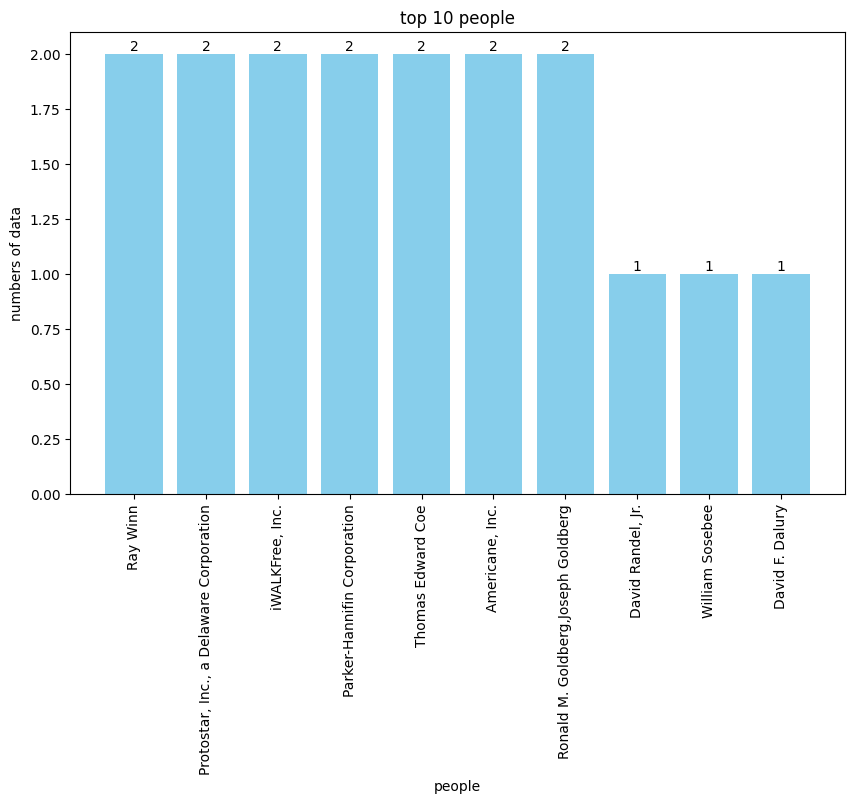

In [14]:
# 출원인별 출원건수 계산
top10_all = df['출원인'].value_counts().nlargest(10)

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 바 그래프 그리기
bars = ax.bar(top10_all.index, top10_all.values, color='skyblue')

# 출원인 이름 세로로 회전시키기
ax.set_xticks(range(len(top10_all)))
ax.set_xticklabels(top10_all.index, rotation=90, ha='center')

# 각 바 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

ax.set_xlabel('people')
ax.set_ylabel('numbers of data')
ax.set_title('top 10 people')
plt.show()

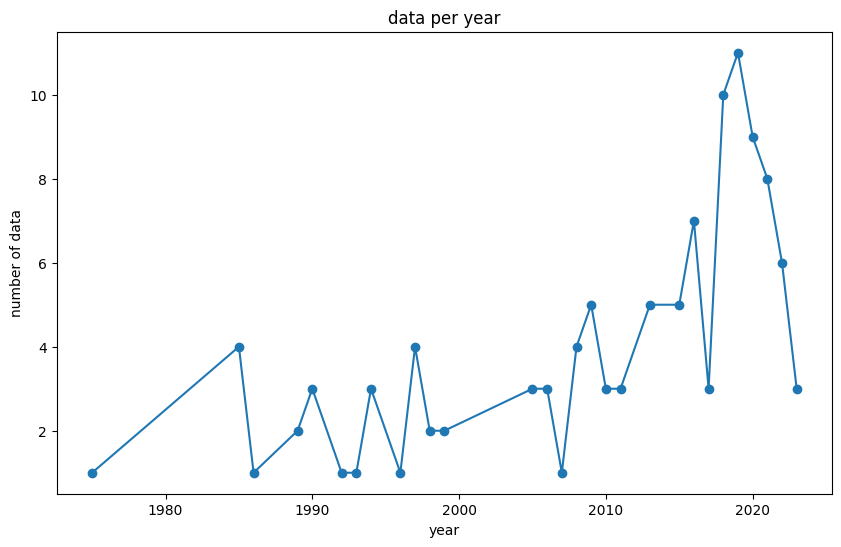

In [15]:
# 년도별 등록건수 계산
applications_by_year = df['등록일자'].value_counts().sort_index()

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 점 찍고 선으로 연결하는 그래프
ax.plot(applications_by_year.index, applications_by_year.values, marker='o', linestyle='-')

ax.set_xlabel('year')
ax.set_ylabel('number of data')
ax.set_title('data per year')
plt.show()

In [16]:
# "발명의 명칭" 열의 데이터 정제
df['발명의명칭'] = df['발명의명칭'].str.lower().replace('[^a-z,.\s]', '', regex=True)

# "출원인" 열의 데이터 정제
df['출원인'] = df['출원인'].str.lower().replace('[^a-z,.\s]', '', regex=True)

# 결과 출력
df.head(100)


,출원번호,출원일자,공고일자,등록일자,발명의명칭,IPC분류,출원인
국가,,,,,,,
US,5372179,1973.6.21,1975.2.25,1975,auxiliary ski for physically handicapped persons,A63C11/22,nippon gakki seizo kabushiki kaisha
US,6454985,1983.1.3,1985.4.9,1985,height adjustable crutch,A61H3/02,"guardian products company, inc."
US,6402594,1982.7.28,1985.4.16,1985,"resilient support foot for walking aids, parti...",A45B9/04,s f orthopadietechnik gmbh
US,6472968,1983.3.7,1985.7.9,1985,cane,"A45B9/00,F16C11/10",knotter david g.
US,6438052,1982.11.1,1985.11.5,1985,sonic rangingdetection system employing varied...,"G01S15/14,G01S7/52",polaroid corporation
...,...,...,...,...,...,...,...
US,15119403,2015.3.31,2020.1.21,2020,wearable robotic device,"A61F5/01,A61H3/00,A61H1/02,B25J9/00,B25J9/10",parkerhannifin corporation
US,16367406,2019.3.28,2020.6.2,2020,motorized robotic walker guided by an image pr...,"A61H3/04,G05D1/02,B60L50/52",the board of trustees of the university of ala...
US,16471276,2019.3.6,2021.9.7,2021,illuminated walking assistance apparatus,"A45B3/04,A45B9/02,F21L4/08,F21V9/08,F21V23/04,...",ray winn


In [17]:
# 세대별로 데이터프레임 분할
df_1G = df[(df['등록일자'] > 1950) & (df['등록일자'] <= 2000)]
df_2G = df[(df['등록일자'] > 2000) & (df['등록일자'] <= 2023)]

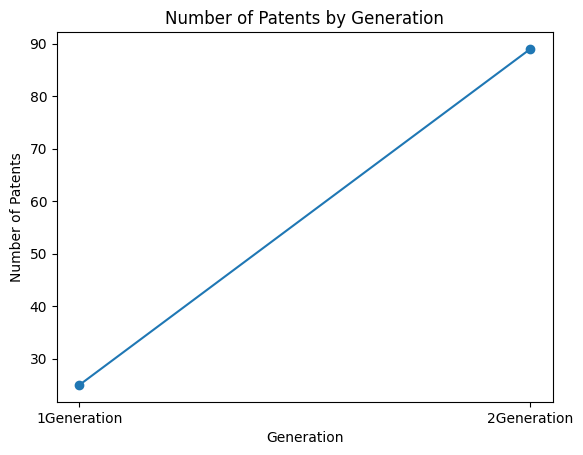

In [18]:
patent_counts = [len(df_1G), len(df_2G)]
generations = ['1Generation', '2Generation']

# 세대별 특허 갯수 추이 그래프 그리기
plt.plot(generations, patent_counts, marker='o')
plt.xlabel('Generation')
plt.ylabel('Number of Patents')
plt.title('Number of Patents by Generation')
plt.show()


In [27]:
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [38]:
import nltk

stop_words = stopwords.words('english')
tokenized_doc1 = df_1G['발명의명칭'].apply(lambda x : x.split())
tokenized_doc2 = df_2G['발명의명칭'].apply(lambda x : x.split())
stpwrd = ['system', 'methods', 'pain', 'apparatus', 'method', 'systems','device','cane','walking','crutch','walker',
          'assistance','associated','crutches','leg','support','ski','tip','attachment','children','aid'
          ,'hand','varied','employing','wheelchair','orthopedic','aids','foot','use','english','devices',
          'impaired','clamp','particularly','stick','handicapped']
stop_words.extend(stpwrd)
tokenized_doc1 = tokenized_doc1.apply(lambda x : [item for item in x
                            if item not in stop_words])
tokenized_doc2 = tokenized_doc2.apply(lambda x : [item for item in x
                            if item not in stop_words])


In [73]:
from collections import Counter

stop_words = stopwords.words('english')
tokenized_doc = df['발명의명칭'].apply(lambda x : x.split())
stpwrd = ['system', 'methods', 'pain', 'apparatus', 'method', 'systems','device','cane','walking','crutch','walker',
          'assistance','associated','crutches','leg','support','ski','tip','attachment','children','aid'
          ,'hand','varied','employing','wheelchair','orthopedic','aids','foot','use','english','devices',
          'impaired','clamp','particularly','stick','handicapped']
stop_words.extend(stpwrd)
tokenized_doc = tokenized_doc.apply(lambda x : [item for item in x
                            if item not in stop_words])


# 각 문서에서 단어 빈도를 계산
word_freq = Counter([word for text in tokenized_doc for word in text])

# 가장 많이 나온 단어 순으로 정렬
top_words = word_freq.most_common(20)  # 상위 20개의 단어

# 결과 출력
print("가장 많이 나온 단어 (df):")
for word, count in top_words:
    print(f"{word}: {count} 건")

가장 많이 나온 단어 (df):
adjustable: 7 건
robotic: 7 건
wheeled: 6 건
collapsible: 5 건
grasping: 3 건
safety: 3 건
base: 3 건
handsfree: 3 건
upright: 3 건
mobility: 3 건
illuminated: 3 건
height: 2 건
audible: 2 건
foldable: 2 건
exercise: 2 건
enhancing: 2 건
assist: 2 건
assembly: 2 건
lower: 2 건


In [64]:
# 말뭉치 단어 사전 생성
from gensim import corpora
dic1 = corpora.Dictionary(tokenized_doc1)
corpus1 = [dic1.doc2bow(text) for text in tokenized_doc1]
dic2 = corpora.Dictionary(tokenized_doc2)
corpus2 = [dic2.doc2bow(text) for text in tokenized_doc2]

In [78]:
import gensim

#1세대 모델 최적화
perplexity_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus1, num_topics=i, id2word=dic1)
    perplexity_values.append(ldamodel.log_perplexity(corpus1))

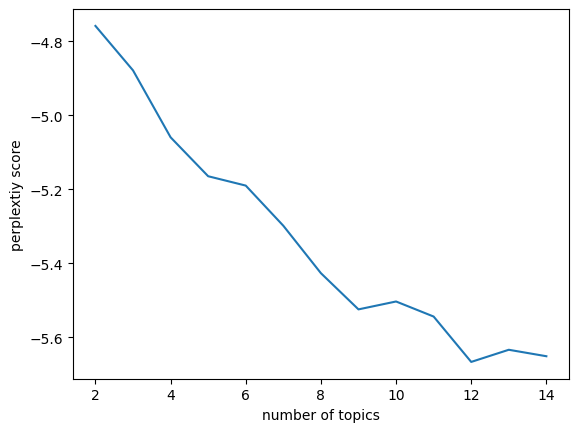

In [79]:
x = range(2,15)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplextiy score")
plt.show()

In [80]:
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus1, num_topics=i, id2word=dic1)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_doc1, dictionary=dic1, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

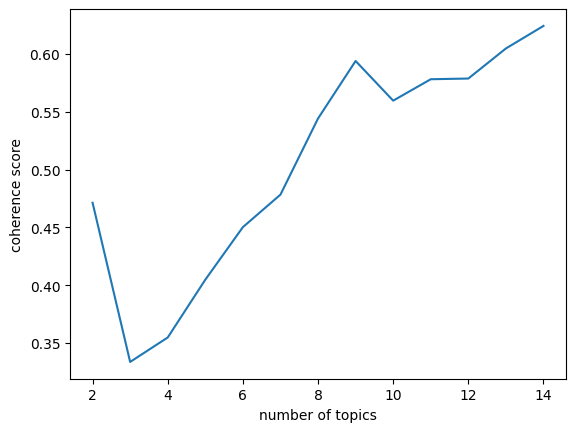

In [81]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [86]:
#1세대
num_topics = 9
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus1, num_topics=num_topics, id2word=dic1, passes=30, iterations=400)
ldamodel.print_topics(num_words=5)

[(0,
  '0.078*"function" + 0.078*"including" + 0.078*"elements" + 0.078*"enhancing" + 0.078*"safety"'),
 (1,
  '0.090*"uprisal" + 0.090*"assist" + 0.090*"dual" + 0.090*"handled" + 0.090*"grasping"'),
 (2,
  '0.021*"wheeled" + 0.021*"grasping" + 0.021*"stickshaped" + 0.021*"type" + 0.021*"collapsible"'),
 (3,
  '0.090*"resistance" + 0.090*"backward" + 0.090*"frontentry" + 0.090*"motion" + 0.090*"foldable"'),
 (4,
  '0.090*"alarm" + 0.090*"projection" + 0.090*"lamp" + 0.090*"audible" + 0.090*"height"'),
 (5,
  '0.119*"adjustable" + 0.119*"grip" + 0.119*"stowable" + 0.119*"combined" + 0.012*"type"'),
 (6,
  '0.133*"vehicles" + 0.133*"antitheft" + 0.133*"automotive" + 0.013*"wheeled" + 0.013*"type"'),
 (7,
  '0.158*"collapsible" + 0.083*"beamwidth" + 0.083*"rangingdetection" + 0.083*"auxiliary" + 0.083*"sonic"'),
 (8,
  '0.108*"mobilityparticularly" + 0.108*"exercise" + 0.108*"propelled" + 0.108*"occupant" + 0.108*"therapy,"')]

In [87]:
import pyLDAvis
import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(ldamodel, corpus1, dic1, sort_topics = False)
pyLDAvis.save_html(vis, "/Users/sunghyun/Desktop/lda.html")

In [88]:
#2세대 모델 최적화

perplexity_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus2, num_topics=i, id2word=dic2)
    perplexity_values.append(ldamodel.log_perplexity(corpus2))

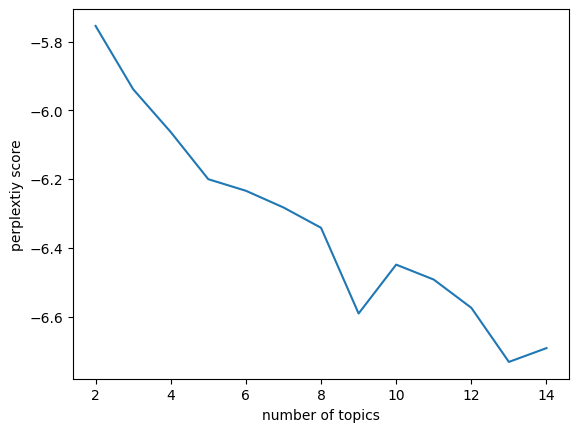

In [89]:
x = range(2,15)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplextiy score")
plt.show()

In [90]:
coherence_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus2, num_topics=i, id2word=dic2)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_doc2, dictionary=dic2, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

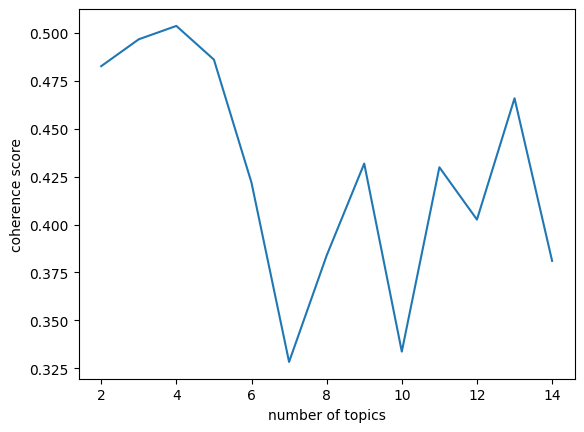

In [91]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [100]:
#2세대
num_topics = 13
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus2, num_topics=num_topics, id2word=dic2, passes=30, iterations=400)
ldamodel.print_topics(num_words=5)

[(0,
  '0.041*"inhibiting" + 0.041*"modulation" + 0.041*"frequency" + 0.041*"high" + 0.041*"cord"'),
 (1,
  '0.061*"energy" + 0.031*"visually" + 0.031*"composite" + 0.031*"fiber" + 0.031*"custom"'),
 (2,
  '0.039*"smart" + 0.039*"warning" + 0.039*"tactile" + 0.039*"technology" + 0.039*"panel"'),
 (3,
  '0.062*"base" + 0.062*"tripod" + 0.062*"mount" + 0.062*"staff" + 0.062*"adaptable"'),
 (4,
  '0.039*"obstacle" + 0.039*"avoidance" + 0.039*"based" + 0.039*"machine" + 0.039*"vision"'),
 (5,
  '0.159*"robotic" + 0.054*"wearable" + 0.028*"automated" + 0.028*"beacon" + 0.028*"wayfinding"'),
 (6,
  '0.070*"stair" + 0.070*"assist" + 0.070*"multifunctional" + 0.005*"movable" + 0.005*"active"'),
 (7,
  '0.122*"adjustable" + 0.082*"gait" + 0.043*"movable" + 0.043*"analysis" + 0.043*"seat"'),
 (8,
  '0.046*"robotic" + 0.046*"motorized" + 0.046*"image" + 0.046*"human" + 0.046*"guided"'),
 (9,
  '0.144*"wheeled" + 0.144*"upright" + 0.144*"collapsible" + 0.004*"inflatable" + 0.004*"active"'),
 (10,


In [101]:
import pyLDAvis
import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(ldamodel, corpus2, dic2, sort_topics = False)
pyLDAvis.save_html(vis, "/Users/sunghyun/Desktop/lda1.html")

In [102]:
from collections import Counter

In [103]:
# %%
cpDf = df.copy()

cpDf

#cpDf['세대'] = np.where(cpDf['출원일자'] >= 1928,
#               np.where(cpDf['출원일자'] > 1980,
#               np.where(cpDf['출원일자'] > 2000,
#               np.where(cpDf['출원일자'] > 2010, '4세대', '3세대'), '2세대'), '1세대'), np.nan)

cpDf['세대'] = np.where(cpDf['등록일자'] <= 2000, '1세대', '2세대')

In [104]:
word_counts = Counter()

for text in cpDf['IPC분류']:
    words = [word.split('/')[0].strip() for word in text.replace(',', ' ').split()]
    word_counts.update(words)


word_counts

# %%
grouped_word_counts = cpDf.groupby('세대')['IPC분류'].apply(lambda x: Counter([word.split('/')[0].strip() for text in x for word in text.replace(',', ' ').split()]))

grouped_word_counts

# %%
df_word_counts = pd.DataFrame(grouped_word_counts)

df_word_counts = df_word_counts.fillna(0).astype(int)

df_word_counts
# %%


IPC분류
세대               
1세대 A63C11      1
    A61H3       8
    A45B9       5
    F16C11      1
    G01S15      1
...           ...
2세대 E01C5       5
    G08B6       1
    H02G9       2
    F21V3       1
    G06V20      1

[146 rows x 1 columns]